In [4]:
#Add required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#craete data frame whit csv file and pandas
df = pd.read_csv('./FuelConsumption.csv')
df.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [6]:
#describe data frame
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [7]:
#Choosing the right data
cdf = df[['ENGINESIZE','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(10)

,ENGINESIZE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,9.9,6.7,8.5,196
1,2.4,11.2,7.7,9.6,221
2,1.5,6.0,5.8,5.9,136
3,3.5,12.7,9.1,11.1,255
4,3.5,12.1,8.7,10.6,244
5,3.5,11.9,7.7,10.0,230
6,3.5,11.8,8.1,10.1,232
7,3.7,12.8,9.0,11.1,255
8,3.7,13.4,9.5,11.6,267
9,2.4,10.6,7.5,9.2,212


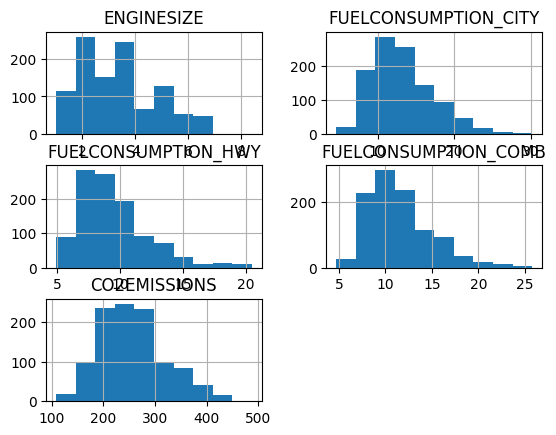

In [8]:
#Viewing the frequency of data on the histogram graph
viz = cdf.hist()
plt.show()

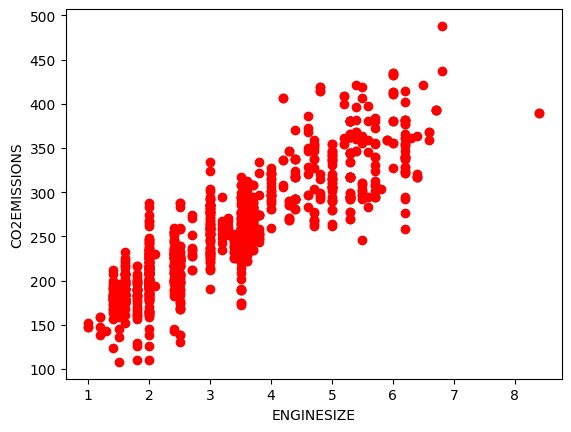

In [9]:
#Compare data with each other
plt.scatter(cdf.ENGINESIZE , cdf.CO2EMISSIONS , color='red')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

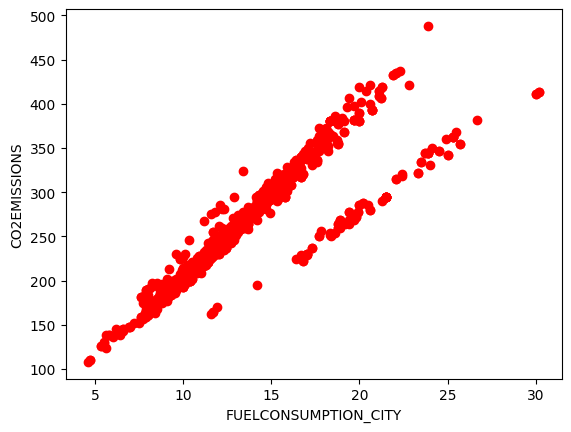

In [10]:
plt.scatter(cdf.FUELCONSUMPTION_CITY , cdf.CO2EMISSIONS , color='red')
plt.xlabel('FUELCONSUMPTION_CITY')
plt.ylabel('CO2EMISSIONS')
plt.show ()

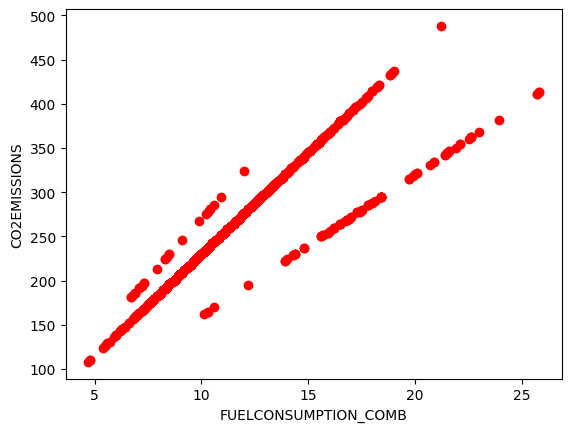

In [11]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS , color='red')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2EMISSIONS')
plt.show()

Based on engine size, we predict and make our model

In [12]:
#Create test and train data
mask = np.random.rand(len(df)) < 0.8
train = cdf[mask]
test = cdf[~mask]

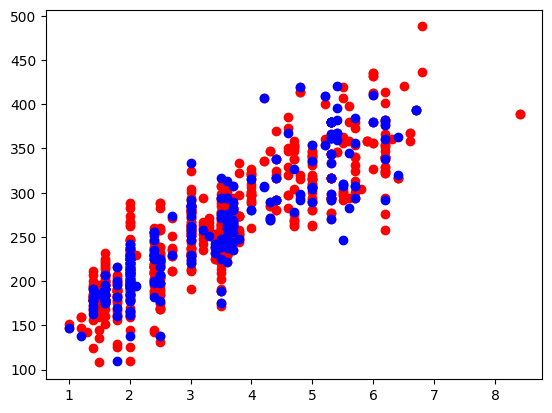

In [13]:
#Simultaneous display of test and train data
fig = plt.figure()
ax1=fig.add_subplot(111)
ax1.scatter(train.ENGINESIZE , train.CO2EMISSIONS , color='red')
ax1.scatter(test.ENGINESIZE ,test.CO2EMISSIONS , color='blue')
plt.show()

In [14]:
#Use a linear regression model to find out coef_ , intercept_
from sklearn import linear_model
model = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
model.fit(train_x , train_y)
print('coefication: ' , model.coef_ , 'intercept: ' , model.intercept_)

coefication:  [[38.6210895]] intercept:  [126.64917058]


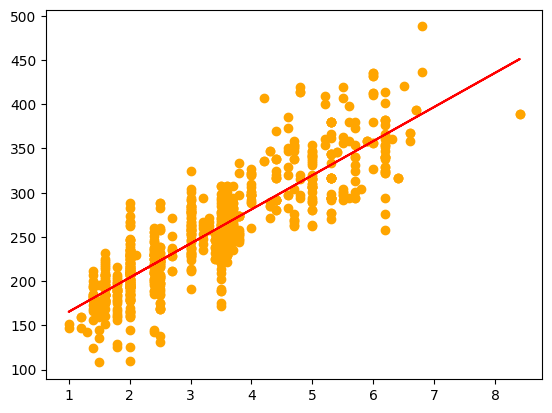

In [15]:
#Line crossing on train Data
plt.scatter(train_x , train_y , color='orange')
plt.plot(train_x , model.coef_[0][0]*train_x + model.intercept_ ,'r')
plt.show()

In [16]:
#Model evaluation
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = model.predict(test_x)
print('r2_score: ' , r2_score(test_y,test_y_))


r2_score:  0.7781821803956983
